Este notebook contém algumas opções de visualização de galáxias simuladas.

In [3]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np
from scipy import stats
from scipy.signal import savgol_filter
from bar_funcs import *
import matplotlib.colors as colors

In [4]:
# for j in range (0, n_snapshots, 20): 
#     index = str(j).zfill(3)
    
snapshot = 'satelites/sat1-30/' + 'snapshot_000.hdf5'

#ler snapshots
f = h5py.File(snapshot, 'r')

#ler info disco
f_disk = f['PartType2']

x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
m_disk = np.array(f_disk['Masses'])
Ndisk = len(np.array(f_disk['ParticleIDs']))

#ler info satélite
f_bndry = f['PartType5']

x_bndry = np.array(f_bndry['Coordinates'][:,0])
y_bndry = np.array(f_bndry['Coordinates'][:,1])
z_bndry = np.array(f_bndry['Coordinates'][:,2])
m_bndry = np.array(f_bndry['Masses'])

#tempo
t = round(f['Header'].attrs['Time'], 2) + 8
print(t)
        
#corrigir posição - centro de massa
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)
            
#corrigir posição - momento angular - disk
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

0.0


In [6]:
snapshot2 = 'satelites/sat1-30/' + 'snapshot_050.hdf5'

#ler snapshot
f2 = h5py.File(snapshot2, 'r')

#ler info disco
f2_disk = f2['PartType2']

x2_disk = np.array(f2_disk['Coordinates'][:,0])
y2_disk = np.array(f2_disk['Coordinates'][:,1])
z2_disk = np.array(f2_disk['Coordinates'][:,2])
vx2_disk = np.array(f2_disk['Velocities'][:,0])
vy2_disk = np.array(f2_disk['Velocities'][:,1])
vz2_disk = np.array(f2_disk['Velocities'][:,2])
m2_disk = np.array(f2_disk['Masses'])
Ndisk2 = len(np.array(f2_disk['ParticleIDs']))

#ler info satélite
f2_bndry = f2['PartType5']

x2_bndry = np.array(f2_bndry['Coordinates'][:,0])
y2_bndry = np.array(f2_bndry['Coordinates'][:,1])
z2_bndry = np.array(f2_bndry['Coordinates'][:,2])
m2_bndry = np.array(f2_bndry['Masses'])

#tempo
t2 = round(f2['Header'].attrs['Time'], 2) + 8
print(t2)
        
#corrigir posição - centro de massa
x2_new_disk, y2_new_disk, z2_new_disk = shift_com(m2_disk, x2_disk, y2_disk, z2_disk)
vx2_new_disk, vy2_new_disk, vz2_new_disk = shift_com(m2_disk, vx2_disk, vy2_disk, vz2_disk)
            
#corrigir posição - momento angular - disk
theta2, phi2 = theta_phi(N=Ndisk2, x=x2_new_disk, y=y2_new_disk, z=z2_new_disk, vx=vx2_new_disk,
                           vy=vy2_new_disk, vz=vz2_new_disk, m=m2_disk)
    
x2, y2, vx2, vy2 = angular_momentum_1(N=Ndisk2, x=x2_new_disk, y=y2_new_disk, vx=vx2_new_disk,
                                      vy=vy2_new_disk, theta=theta2)
   
x2, z2, vx2, vz2 = angular_momentum_2(N=Ndisk2, x=x2, z=z2_new_disk, vx=vx2, vz=vz2_new_disk, phi=phi2)

2.5


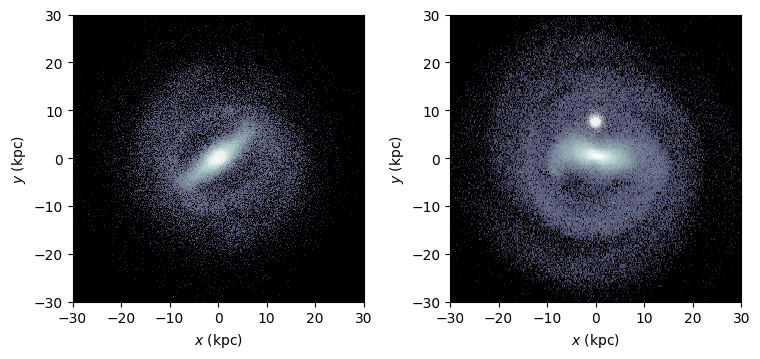

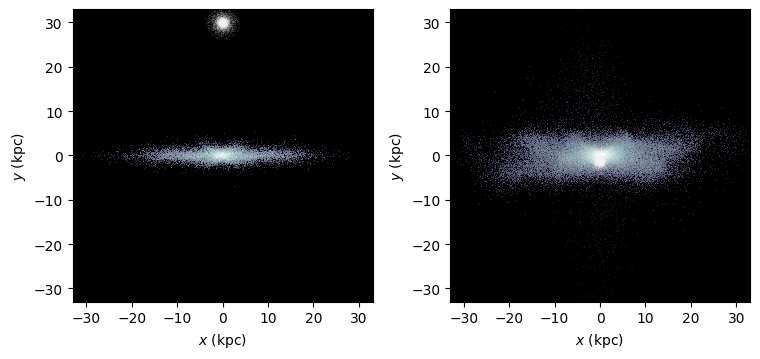

In [48]:
plt.figure(figsize=[7.7,3.7])

plt.subplot(121, facecolor='black')
plt.hist2d(x, y, bins=500, cmap='bone', norm='symlog', shading='auto')
plt.plot(x_bndry, y_bndry, 'w,', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.subplot(122, facecolor='black')
plt.hist2d(x2, y2, bins=500, cmap='bone', norm='symlog', shading='auto')
plt.plot(x2_bndry, y2_bndry, 'w,', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.tight_layout()


plt.figure(figsize=[7.7,3.7])

plt.subplot(121, facecolor='black')
plt.hist2d(x, z, bins=500, cmap='bone', norm='symlog', shading='auto')
plt.plot(x_bndry, z_bndry, 'w,', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.xlim(-33,33)
plt.ylim(-33,33)

plt.subplot(122, facecolor='black')
plt.hist2d(x2, z2, bins=500, cmap='bone', norm='symlog', shading='auto')
plt.plot(x2_bndry, z2_bndry, 'w,', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.xlim(-33,33)
plt.ylim(-33,33)

plt.tight_layout()

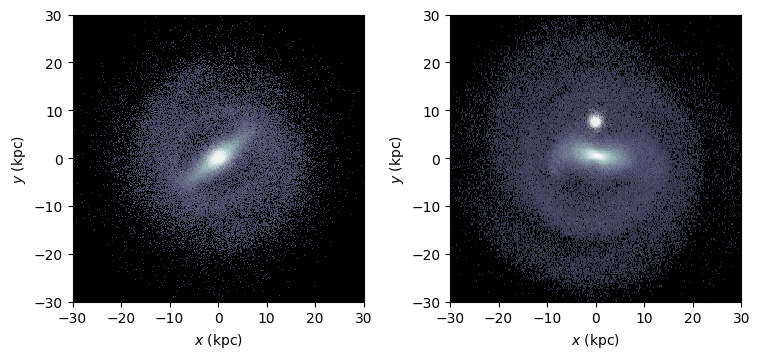

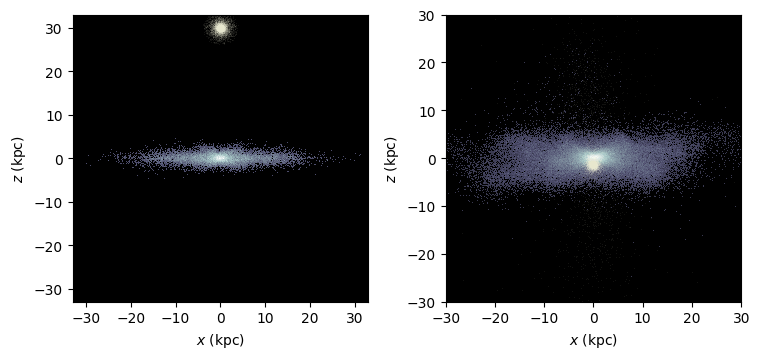

In [58]:
plt.figure(figsize=[7.7,3.7])

gamma = 0.25

plt.subplot(121, facecolor='black')
plt.hist2d(x, y, bins=500, cmap='bone', norm=colors.PowerNorm(gamma))
plt.plot(x_bndry, y_bndry, 'w,', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.subplot(122, facecolor='black')
plt.hist2d(x2, y2, bins=500, cmap='bone', norm=colors.PowerNorm(gamma))
plt.plot(x2_bndry, y2_bndry, 'w,', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.tight_layout()


plt.figure(figsize=[7.7,3.7])

gamma = 0.25

plt.subplot(121, facecolor='black')
plt.hist2d(x, z, bins=500, cmap='bone', norm=colors.PowerNorm(gamma))
plt.plot(x_bndry, z_bndry, ',', color='beige', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$z$ (kpc)')
plt.xlim(-33,33)
plt.ylim(-33,33)

plt.subplot(122, facecolor='black')
plt.hist2d(x2, z2, bins=500, cmap='bone', norm=colors.PowerNorm(gamma))
plt.plot(x2_bndry, z2_bndry, ',', color='beige', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$z$ (kpc)')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.tight_layout()
#plt.savefig('teste_visualizacao.png')

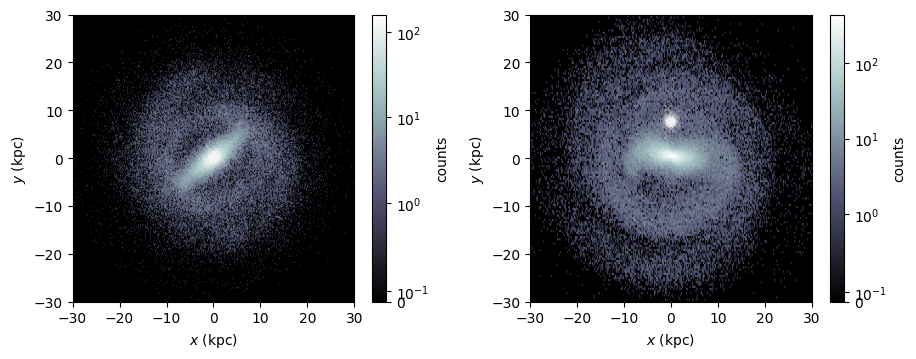

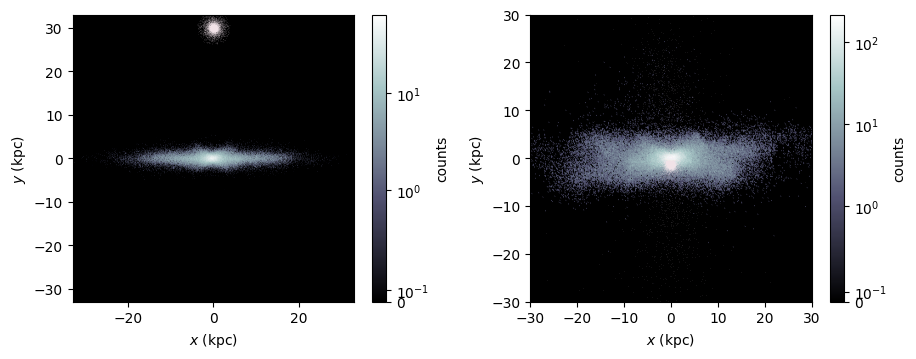

In [54]:
plt.figure(figsize=[9.3,3.7])

lnrwidth = 0.9

plt.subplot(121, facecolor='black')
plt.hexbin(x, y, gridsize=500, cmap='bone', norm=colors.SymLogNorm(linthresh=lnrwidth, linscale=1))
plt.plot(x_bndry, y_bndry, 'w,', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.colorbar(label='counts')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.subplot(122, facecolor='black')
plt.hexbin(x2, y2, gridsize=500, cmap='bone', norm=colors.SymLogNorm(linthresh=lnrwidth, linscale=1))
plt.plot(x2_bndry, y2_bndry, 'w,', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.colorbar(label='counts')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.tight_layout()


plt.figure(figsize=[9.3,3.7])

lnrwidth = 0.9

plt.subplot(121, facecolor='black')
plt.hexbin(x, z, gridsize=500, cmap='bone', norm=colors.SymLogNorm(linthresh=lnrwidth, linscale=1))
plt.plot(x_bndry, z_bndry, ',', color='lavenderblush', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.colorbar(label='counts')
plt.xlim(-33,33)
plt.ylim(-33,33)

plt.subplot(122, facecolor='black')
plt.hexbin(x2, z2, gridsize=500, cmap='bone', norm=colors.SymLogNorm(linthresh=lnrwidth, linscale=1))
plt.plot(x2_bndry, z2_bndry, ',', color='lavenderblush', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.colorbar(label='counts')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.tight_layout()
#plt.savefig('teste_visualizacao.png')

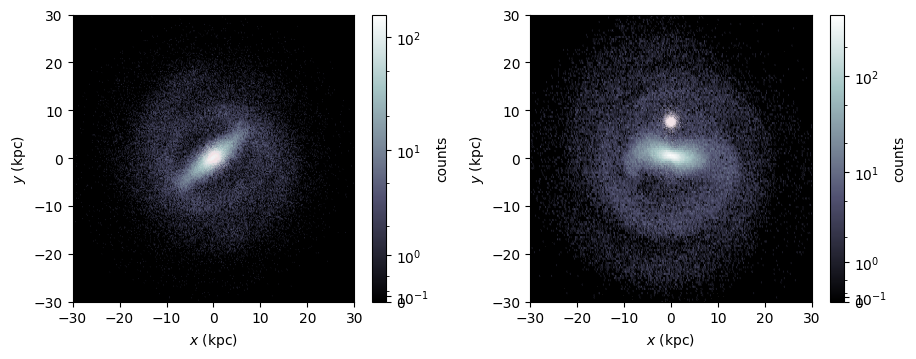

In [55]:
plt.figure(figsize=[9.3,3.7])

lnrwidth = 0.9

plt.subplot(121, facecolor='black')
plt.hexbin(x, y, gridsize=500, cmap='bone', norm=colors.AsinhNorm(linear_width=lnrwidth))
plt.plot(x_bndry, y_bndry, ',', color='lavenderblush', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.colorbar(label='counts')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.subplot(122, facecolor='black')
plt.hexbin(x2, y2, gridsize=500, cmap='bone', norm=colors.AsinhNorm(linear_width=lnrwidth))
plt.plot(x2_bndry, y2_bndry, ',', color='lavenderblush', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.colorbar(label='counts')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.tight_layout()
#plt.savefig('teste_visualizacao.png')

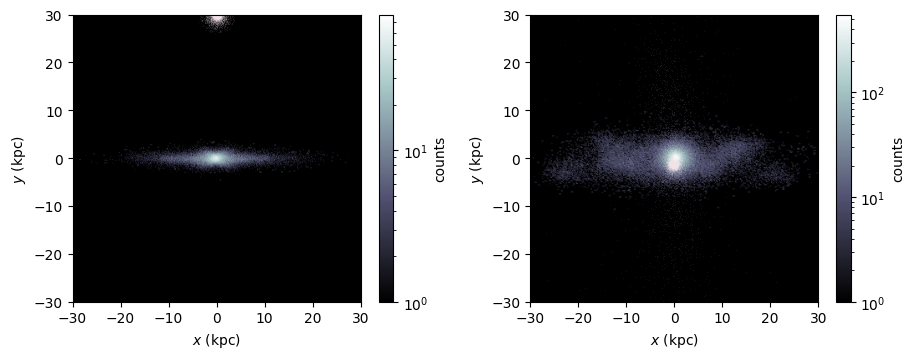

In [56]:
plt.figure(figsize=[9.3,3.7])

plt.subplot(121, facecolor='black')
plt.hexbin(y, z, gridsize=500, bins='log', cmap='bone')
plt.plot(x_bndry, z_bndry, ',', color='lavenderblush', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.colorbar(label='counts')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.subplot(122, facecolor='black')
plt.hexbin(y2, z2, gridsize=500, bins='log', cmap='bone')
plt.plot(x2_bndry, z2_bndry, ',', color='lavenderblush', alpha=0.07)
plt.xlabel('$x$ (kpc)')
plt.ylabel('$y$ (kpc)')
plt.colorbar(label='counts')
plt.xlim(-30,30)
plt.ylim(-30,30)

plt.tight_layout()
#plt.savefig('teste_visualizacao.png')